# Cluster Information
To illustrate the extent of clustering. E.g., Figure 2 of [this paper](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.80.717&rep=rep1&type=pdf)  
I shifted the scripts to `scripts/run_compute_mi.py`  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
from tqdm import tqdm

## Cluster by verb or construction
How much does the verb or the construction information contribute to the clustering?  
Y - cluster assignment. V - verb. C - construction.  
I(Y;V) and I(Y;C) can be computed.

In [2]:
def analyze_across_models(n_cluster_setting=4, layer=0):
    model_fnames = ["roberta-med-small-1M-1","roberta-base-10M-1","roberta-base-100M-1","roberta-base-1B-1"]
    model_n_data = [10**6, 10**7, 10**8, 10**9]
    plotdata = {
        "construction_mi": [], "verb_mi": [], "model_n_data": []
    }
    for fname, n_data in zip(model_fnames, model_n_data):
        report = pd.read_csv(f"0730_dendrogram/report_MI_nyu-mll_{fname}.csv")
        report = report[(report.n_clusters == n_cluster_setting) & (report.layer == layer)]
        
        plotdata["construction_mi"] += report["I(Y;C)"].tolist()
        plotdata["verb_mi"] += report["I(Y;V)"].tolist()
        plotdata["model_n_data"] += [n_data]*len(report)
    plotdata = pd.DataFrame(plotdata)
    
    fig, ax = plt.subplots(1,1)
    sns.lineplot(data=plotdata, x="model_n_data", y="verb_mi", label="I(Y;V)", ax=ax)
    sns.lineplot(data=plotdata, x="model_n_data", y="construction_mi", label="I(Y;C)", ax=ax)
    ax.set_xscale('log')
    ax.set_xlim([10**6, 10**9])
    ax.set_ylim([0, 1.0])
    ax.set_title(f"Mutual information (n_cluster={n_cluster_setting}, layer={layer})")
    plt.show()
    
#for layer in range(13):
#    analyze_across_models(n_cluster_setting=4, layer=layer)
#for layer in range(13):
#    analyze_across_models(n_cluster_setting=16, layer=layer)

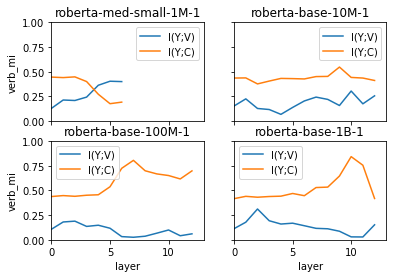

In [3]:
def group_plot(n_cluster_setting=4):
    model_fnames = ["roberta-med-small-1M-1","roberta-base-10M-1","roberta-base-100M-1","roberta-base-1B-1"]
    model_n_data = [10**6, 10**7, 10**8, 10**9]
    plotdata = {
        "construction_mi": [], "verb_mi": [], "model_n_data": [], "layer": []
    }
    for fname, n_data in zip(model_fnames, model_n_data):
        report = pd.read_csv(f"0730_dendrogram/report_MI_nyu-mll_{fname}.csv")
        report = report[report.n_clusters == n_cluster_setting]
        
        plotdata["construction_mi"] += report["I(Y;C)"].tolist()
        plotdata["verb_mi"] += report["I(Y;V)"].tolist()
        plotdata["model_n_data"] += [n_data]*len(report)
        plotdata["layer"] += report["layer"].tolist()
    plotdata = pd.DataFrame(plotdata)
    
    fig, axes = plt.subplots(2,2, sharex=True, sharey=True)
    for j, id_ in enumerate([(0,0), (0,1), (1,0), (1,1)]):
        ax = axes[id_]
        modeldata = plotdata[plotdata.model_n_data==model_n_data[j]]
        
        sns.lineplot(data=modeldata, x="layer", y="verb_mi", label="I(Y;V)", ax=ax)
        sns.lineplot(data=modeldata, x="layer", y="construction_mi", label="I(Y;C)", ax=ax)
        #import pdb; pdb.set_trace()
        
        ax.set_title(model_fnames[j])
    plt.xlim([0,13])
    plt.ylim([0, 1.0])
    
    plt.show()
    
group_plot(n_cluster_setting=4)

Observations:
- $I(Y;C)$ and $I(Y;V)$ seem to have some reciprocal relationship.  
- For RoBERTa-base, upper layers somehow prefer construction grouping.  
- For RoBERTa-med (with 1M training tokens), lower layers prefer construction grouping.  
- When training token increases, upper layers rely more on construction grouping.

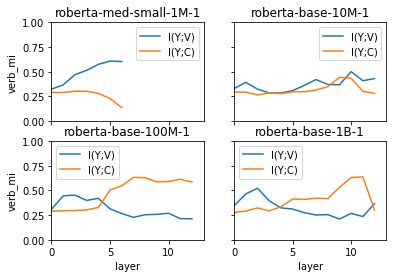

In [4]:
group_plot(n_cluster_setting=16)

Observations:  
- The trends for 4-group clustering basically stand here as well.  